#PYSAL Workshop 

In [2]:
# Import necessary packages
import os
import matplotlib.pyplot as plt
import seaborn as sns
# Use geopandas for vector data and rasterio for raster data
import geopandas as gpd
import rasterio as rio
from rasterio.merge import merge
from rasterio.plot import show
# Plotting extent is used to plot raster & vector data together
from rasterio.plot import plotting_extent

In [3]:
# File and folder paths

In [4]:
dirpath = r"D:\SwimmingPoolProject\data"

out_fp = r"D:\SwimmingPoolProject\data\PYSAL_outputs"


In [5]:
#Test
m = (r"D:\\SwimmingPoolProject\\data\\NAIP_SI\\m_4007423_se_18_1_20170826\\m_4007423_se_18_1_20170826.tif")

## NAIP 

Note to Self: This is bring in the data from my folder 

Data: 

In [12]:
b = [(r"D:\\SwimmingPoolProject\\data\\NAIP_SI\\m_4007423_se_18_1_20170826\\m_4007423_se_18_1_20170826.tif"),
(r"D:\\SwimmingPoolProject\\data\\NAIP_SI\\m_4007423_sw_18_1_20170826\\m_4007423_sw_18_1_20170826.tif"),
 (r"D:\\SwimmingPoolProject\\data\\NAIP_SI\\m_4007424_se_18_1_20170826\\m_4007424_se_18_1_20170826.tif"),
(r"D:\\SwimmingPoolProject\\data\\NAIP_SI\\m_4007424_sw_18_1_20170826\\m_4007424_sw_18_1_20170826.tif"),
 (r"D:\\SwimmingPoolProject\\data\\NAIP_SI\\m_4007430_se_18_1_20170826\\m_4007430_se_18_1_20170826.tif"),
(r"D:\\SwimmingPoolProject\\data\\NAIP_SI\\m_4007431_ne_18_1_20170826\\m_4007431_ne_18_1_20170826.tif"),
 (r"D:\\SwimmingPoolProject\\data\\NAIP_SI\\m_4007431_nw_18_1_20170826\\m_4007431_nw_18_1_20170826.tif"),
 (r"D:\\SwimmingPoolProject\\data\\NAIP_SI\\m_4007431_se_18_1_20170826\\m_4007431_se_18_1_20170826.tif"),
(r"D:\\SwimmingPoolProject\\data\\NAIP_SI\\m_4007431_sw_18_1_20170826\\m_4007431_sw_18_1_20170826.tif"),
 (r"D:\\SwimmingPoolProject\\data\\NAIP_SI\\m_4007432_ne_18_1_20170826\\m_4007432_ne_18_1_20170826.tif"),
(r"D:\\SwimmingPoolProject\\data\\NAIP_SI\\m_4007432_nw_18_1_20170826\\m_4007432_nw_18_1_20170826.tif"),
(r"D:\\SwimmingPoolProject\\data\\NAIP_SI\\m_4007432_sw_18_1_20170826\\m_4007432_sw_18_1_20170826.tif"),
 (r"D:\\SwimmingPoolProject\\data\\NAIP_SI\\m_4007438_ne_18_1_20170826\\m_4007438_ne_18_1_20170826.tif"),
(r"D:\\SwimmingPoolProject\\data\\NAIP_SI\\m_4007439_nw_18_1_20170826\\m_4007439_nw_18_1_20170826.tif")]

In [13]:
b

['D:\\\\SwimmingPoolProject\\\\data\\\\NAIP_SI\\\\m_4007423_se_18_1_20170826\\\\m_4007423_se_18_1_20170826.tif',
 'D:\\\\SwimmingPoolProject\\\\data\\\\NAIP_SI\\\\m_4007423_sw_18_1_20170826\\\\m_4007423_sw_18_1_20170826.tif',
 'D:\\\\SwimmingPoolProject\\\\data\\\\NAIP_SI\\\\m_4007424_se_18_1_20170826\\\\m_4007424_se_18_1_20170826.tif',
 'D:\\\\SwimmingPoolProject\\\\data\\\\NAIP_SI\\\\m_4007424_sw_18_1_20170826\\\\m_4007424_sw_18_1_20170826.tif',
 'D:\\\\SwimmingPoolProject\\\\data\\\\NAIP_SI\\\\m_4007430_se_18_1_20170826\\\\m_4007430_se_18_1_20170826.tif',
 'D:\\\\SwimmingPoolProject\\\\data\\\\NAIP_SI\\\\m_4007431_ne_18_1_20170826\\\\m_4007431_ne_18_1_20170826.tif',
 'D:\\\\SwimmingPoolProject\\\\data\\\\NAIP_SI\\\\m_4007431_nw_18_1_20170826\\\\m_4007431_nw_18_1_20170826.tif',
 'D:\\\\SwimmingPoolProject\\\\data\\\\NAIP_SI\\\\m_4007431_se_18_1_20170826\\\\m_4007431_se_18_1_20170826.tif',
 'D:\\\\SwimmingPoolProject\\\\data\\\\NAIP_SI\\\\m_4007431_sw_18_1_20170826\\\\m_4007431_sw_18_

In [14]:
NAIP_files_to_mosaic = []

In [15]:
 for fp in b:
   ....:     src = rio.open(fp)
   ....:     NAIP_files_to_mosaic.append(src)

In [16]:
NAIP_files_to_mosaic

[<open DatasetReader name='D:/SwimmingPoolProject/data/NAIP_SI/m_4007423_se_18_1_20170826/m_4007423_se_18_1_20170826.tif' mode='r'>,
 <open DatasetReader name='D:/SwimmingPoolProject/data/NAIP_SI/m_4007423_sw_18_1_20170826/m_4007423_sw_18_1_20170826.tif' mode='r'>,
 <open DatasetReader name='D:/SwimmingPoolProject/data/NAIP_SI/m_4007424_se_18_1_20170826/m_4007424_se_18_1_20170826.tif' mode='r'>,
 <open DatasetReader name='D:/SwimmingPoolProject/data/NAIP_SI/m_4007424_sw_18_1_20170826/m_4007424_sw_18_1_20170826.tif' mode='r'>,
 <open DatasetReader name='D:/SwimmingPoolProject/data/NAIP_SI/m_4007430_se_18_1_20170826/m_4007430_se_18_1_20170826.tif' mode='r'>,
 <open DatasetReader name='D:/SwimmingPoolProject/data/NAIP_SI/m_4007431_ne_18_1_20170826/m_4007431_ne_18_1_20170826.tif' mode='r'>,
 <open DatasetReader name='D:/SwimmingPoolProject/data/NAIP_SI/m_4007431_nw_18_1_20170826/m_4007431_nw_18_1_20170826.tif' mode='r'>,
 <open DatasetReader name='D:/SwimmingPoolProject/data/NAIP_SI/m_4007

In [17]:
mosaic, out_trans = merge(NAIP_files_to_mosaic)

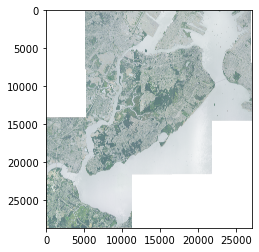

<AxesSubplot:>

In [18]:
show(mosaic, cmap='terrain')

In [19]:
NAIP_files_to_mosaic.append()

TypeError: append() takes exactly one argument (0 given)

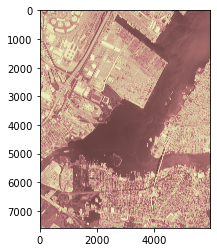

In [6]:
#open file 

raster_m = rio.open(m)
plt.imshow(raster_m.read(1), cmap='pink')

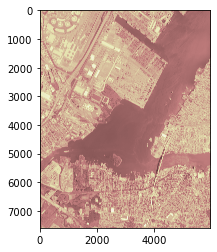

In [8]:
#open file 

raster_m = rio.open(m)
plt.imshow(raster_m.read(2), cmap='pink')

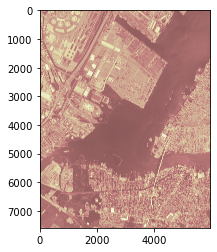

In [9]:
#open file 

raster_m = rio.open(m)
plt.imshow(raster_m.read(3), cmap='pink')

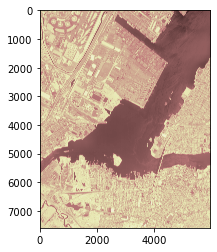

In [10]:
#open file 

raster_m = rio.open(m)
plt.imshow(raster_m.read(4), cmap='pink')

In [ ]:
src = rasterio.open("tests/data/RGB.byte.tif")
>>> pyplot.imshow(src.read(1), cmap='pink')
<matplotlib.image.AxesImage object at 0x...>
>>> pyplot.show()

In [16]:
type(raster_m)

rasterio.io.DatasetReader

In [6]:
NAIP = [
m_4007423_se_18_1_20170826_tif = (r"D:\\SwimmingPoolProject\\data\\NAIP_SI\\m_4007423_se_18_1_20170826\\m_4007423_se_18_1_20170826.tif"),
m_4007423_sw_18_1_20170826_tif = (r"D:\\SwimmingPoolProject\\data\\NAIP_SI\\m_4007423_sw_18_1_20170826\\m_4007423_sw_18_1_20170826.tif"),
m_4007424_se_18_1_20170826_tif = (r"D:\\SwimmingPoolProject\\data\\NAIP_SI\\m_4007424_se_18_1_20170826\\m_4007424_se_18_1_20170826.tif"),
m_4007424_sw_18_1_20170826_tif = (r"D:\\SwimmingPoolProject\\data\\NAIP_SI\\m_4007424_sw_18_1_20170826\\m_4007424_sw_18_1_20170826.tif"),
m_4007430_se_18_1_20170826_tif = (r"D:\\SwimmingPoolProject\\data\\NAIP_SI\\m_4007430_se_18_1_20170826\\m_4007430_se_18_1_20170826.tif"),
m_4007431_ne_18_1_20170826_tif = (r"D:\\SwimmingPoolProject\\data\\NAIP_SI\\m_4007431_ne_18_1_20170826\\m_4007431_ne_18_1_20170826.tif"),
m_4007431_nw_18_1_20170826_tif = (r"D:\\SwimmingPoolProject\\data\\NAIP_SI\\m_4007431_nw_18_1_20170826\\m_4007431_nw_18_1_20170826.tif"),
m_4007431_se_18_1_20170826_tif = (r"D:\\SwimmingPoolProject\\data\\NAIP_SI\\m_4007431_se_18_1_20170826\\m_4007431_se_18_1_20170826.tif"),
m_4007431_sw_18_1_20170826_tif = (r"D:\\SwimmingPoolProject\\data\\NAIP_SI\\m_4007431_sw_18_1_20170826\\m_4007431_sw_18_1_20170826.tif"),
m_4007432_ne_18_1_20170826_tif = (r"D:\\SwimmingPoolProject\\data\\NAIP_SI\\m_4007432_ne_18_1_20170826\\m_4007432_ne_18_1_20170826.tif"),
m_4007432_nw_18_1_20170826_tif = (r"D:\\SwimmingPoolProject\\data\\NAIP_SI\\m_4007432_nw_18_1_20170826\\m_4007432_nw_18_1_20170826.tif"),
m_4007432_sw_18_1_20170826_tif = (r"D:\\SwimmingPoolProject\\data\\NAIP_SI\\m_4007432_sw_18_1_20170826\\m_4007432_sw_18_1_20170826.tif"),
m_4007438_ne_18_1_20170826_tif = (r"D:\\SwimmingPoolProject\\data\\NAIP_SI\\m_4007438_ne_18_1_20170826\\m_4007438_ne_18_1_20170826.tif"),
m_4007439_nw_18_1_20170826_tif = (r"D:\\SwimmingPoolProject\\data\\NAIP_SI\\m_4007439_nw_18_1_20170826\\m_4007439_nw_18_1_20170826.tif")]

SyntaxError: invalid syntax (<ipython-input-6-a4b726738185>, line 2)

In [3]:
src_files_to_mosaic = []